In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [4]:
dfCounties = pd.read_csv('poorCounties.csv')
poorCounties = dfCounties['County'].values

dfCounties = pd.read_csv('richCounties.csv')
countyList = dfCounties['County'].values
stateList = dfCounties['State'].values
# print(countyList1)

countyList1 = []
for i in range(len(stateList)):
    val = countyList[i]+', '+stateList[i]
    countyList1.append(val)
richCounties = countyList1

print(richCounties)

['Loudoun County, Virginia', 'Howard County, Maryland', 'Fairfax County, Virginia', 'Hunterdon County, New Jersey', 'Santa Clara County, California', 'Arlington County, Virginia', 'Douglas County, Colorado', 'San Mateo County, California', 'Morris County, New Jersey', 'Williamson County, Tennessee', 'Nassau County, New York', 'Somerset County, New Jersey', 'Marin County, California', 'San Francisco County, California', 'Delaware County, Ohio', 'Forsyth County, Georgia', 'Montgomery County, Maryland', 'Calvert County, Maryland', 'Prince William County, Virginia', 'Stafford County, Virginia', 'Putnam County, New York', 'Anne Arundel County, Maryland', 'Charles County, Maryland', 'Rockwall County, Texas', 'Middlesex County, Massachusetts']


In [5]:
def sort_counties(countyList):
    s = sorted(countyList,key = lambda row: row.split(',')[0])
    return sorted(s,key = lambda row: row.split(',')[1][1:])

richCounties = sort_counties(richCounties)
poorCounties = sort_counties(poorCounties)


# dfRichLaborForce = pd.read_csv('richLaborForce.csv')
# dfPoorLaborForce = pd.read_csv('poorLaborForce.csv')

# dfRichUnemployment = pd.read_csv('RichUnemployment.csv')
# dfPoorUnemployment = pd.read_csv('poorUnemployment.csv')


# # try:
# #     dfRichUnm = dfRichLaborForce.drop(columns = ['Unnamed: 0'])
# # continue:
# #     pass


# print(dfPoorLaborForce.shape[1])
# print(len(poorCounties))
# rename_dict = {}
# i =0




# for row in dfPoorLaborForce:
#     if row != 'DATE':
        
#         count = poorCounties[i]
#         i+=1
#         rename_dict[row] = count
        
# dfPoorLaborForce = dfPoorLaborForce.rename(columns=rename_dict)






# dfPoorLaborForce.to_csv('poorLaborForce.csv')

# # print(len(richCounties))
# assert False

# # for c in richCounties:
    




In [6]:
dfRichLaborForce = pd.read_csv('richLaborForce.csv')
dfPoorLaborForce = pd.read_csv('poorLaborForce.csv')


dfRichUnemployment = pd.read_csv('RichUnemployment.csv')
dfPoorUnemployment = pd.read_csv('poorUnemployment.csv')


dfdictpoor = {'County':[],'Unemployment Increase':[],'Labor Force':[]}
dfdictrich = {'County':[],'Unemployment Increase':[],'Labor Force':[]}

#create poor data

for row in dfRichLaborForce:
    if row not in ['Unnamed: 0','DATE']:
        
        
        dfdictrich['County'].append(row)
        rowvals = dfRichUnemployment[row].values
        ind = np.argmax(rowvals)-2
        changeInUnemployment = max(list(rowvals))-rowvals[ind]
        dfdictrich['Unemployment Increase'].append(round(changeInUnemployment,3))
        dfdictrich['Labor Force'].append(dfRichLaborForce[row].values[-1])
        
dfrich = pd.DataFrame(dfdictrich)

# dfrich.to_csv('richUnemploymentLaborData.csv')



In [7]:
# dfrich = pd.read_csv('richUnemploymentLaborData.csv')
# dfpoor = pd.read_csv('poorUnemploymentLaborData.csv')

# dfdictpoor = {'State':[],'County':[],'Unemployment Increase':[],'Labor Force':[]}
# dfdictrich = {'State':[],'County':[],'Unemployment Increase':[],'Labor Force':[]}

# countyData = dfrich['County'].values

# unemploymentIncrease = list(dfrich['Unemployment Increase'].values)
# # newunemploymentIncrease = []
# # for i in range(len(unemploymentIncrease)):
# #     newunemploymentIncrease.append(round(unemploymentIncrease[i],3))
# # unemploymentIncrease = newunemploymentIncrease

# laborforce = list(dfrich['Labor Force'].values)

# counties = []

# states = []

# for i in range(dfrich.shape[0]):
    
#     val = countyData[i].split(',')
#     county = val[0].split(' County')[0]
#     state = val[1][1:]
#     counties.append(county)
#     states.append(state)

# dfdictrich = {'State':states,'County':counties,
#               'Unemployment Increase':unemploymentIncrease,
#               'Labor Force':laborforce}

# dfpoor2 = pd.DataFrame(dfdictrich)

# # print(dfpoor2)
# # dfpoor2.to_csv('richUnemploymentLaborData.csv')



In [8]:
# mobilitydfpoor = pd.read_csv('ComparisonData/mobilityReductionPoor.csv')
# mobilitydfrich = pd.read_csv('ComparisonData/mobilityReductionRich.csv')

# for row in mobilitydfrich:
#     print(row)
    

    
# vals = []

# states = mobilitydfrich['State'].values
# counties = mobilitydfrich['County'].values
# MobilityRed = mobilitydfrich['Mobility Reduction'].values

# for i in range(mobilitydfrich.shape[0]):
#     vals.append([states[i],counties[i].split(' County')[0],MobilityRed[i]])

# vals = sorted(vals,key = lambda row: row[1])
# vals = sorted(vals,key = lambda row: row[0])



# vals = np.array(vals)


# mobilitydictrich = {'State':vals[:,0],'County':vals[:,1],'Mobility Reduction':vals[:,2]}

# dfmobrich = pd.DataFrame(mobilitydictrich)

# # print(dfmobrich)


dfpoprich = pd.read_csv('ComparisonData/covidDeathsPoor.csv')

# print(dfpoprich)

dfpoprich = dfpoprich.sort_values(['State','County'])
# dfpoprich = dfpoprich.sort_values('State')
dfpoprich = dfpoprich.drop(columns = ['Unnamed: 0'])
print(dfpoprich)

# dfpoprich.to_csv('ComparisonData/covidDeathsPoor.csv')

    




             State         County  Covid Deaths
0         Arkansas            Lee            18
1         Arkansas        Lincoln            17
2         Colorado           Bent             0
3         Colorado        Crowley             1
4          Florida        Calhoun            14
5          Florida         DeSoto            28
6          Florida         Glades             6
7          Florida       Hamilton             9
8          Florida      Lafayette            15
9          Florida        Liberty            10
10         Florida          Union            28
11         Georgia       Brantley            12
12         Georgia        Calhoun             9
13         Georgia       Charlton            10
14         Georgia        Johnson            22
15         Georgia         Lanier             7
16         Georgia           Long             4
17         Georgia        Stewart            16
18         Georgia        Telfair            23
19         Georgia        Wheeler       

In [9]:
#let's try to access and process the mobility data for each one of these locations:
mobilitydf = pd.read_csv('2020_US_Region_Mobility_Report.csv')

mobility_data_dict_poor = {'State':[],'County':[], 'Mobility Reduction': []}
mobility_data_dict_rich = {'State':[],'County':[], 'Mobility Reduction': []}

for l in richCounties:
    
    [county,state] = l.split(',')
    
    state = state[1:]
    newdfState = mobilitydf[mobilitydf['sub_region_1']==state]
    newdf = newdfState[newdfState['sub_region_2']==county]
    
    if newdf.empty:
        newdf = newdfState.iloc[:270,:]
        
#     else:
#     print(county,state)
#         print(newdf.head())

#     if county.startswith('Liberty'):
#         print(newdf['retail_and_recreation_percent_change_from_baseline'].values)
#         print(newdf.head())
#         assert False
    

    smoothed_data = []
    dataVals = newdf['retail_and_recreation_percent_change_from_baseline'].values
    for i in range(len(dataVals)):
        if np.isnan(dataVals[i]):
            dataVals[i] = 0
        
    if -.1 < np.nanmin(dataVals) < 0.1:
        newdf = newdfState.iloc[:270,:]
#         print(np.nanmin(newdf['retail_and_recreation_percent_change_from_baseline'].values))
        dataVals = newdf['retail_and_recreation_percent_change_from_baseline'].values
        
        
    
    
#     for i in range(14,len(dataVals)):
#         smoothed_data.append(np.mean(dataVals[i-14:i]))
        
#     if np.isnan(min(smoothed_data)):
#         print(county,state)
#         print(dataVals)
#         plt.plot(smoothed_data)
        
#         assert False
#     print(min(smoothed_data))
    
    
    lockdownLevel =  np.nanmin(dataVals)
    mobility_data_dict_poor['Mobility Reduction'].append(lockdownLevel)
    mobility_data_dict_poor['State'].append(state)
    mobility_data_dict_poor['County'].append(county)
        
    
dfmob = pd.DataFrame(mobility_data_dict_poor)
dfmob.to_csv('mobilityReductionRich.csv')


    

FileNotFoundError: [Errno 2] File 2020_US_Region_Mobility_Report.csv does not exist: '2020_US_Region_Mobility_Report.csv'

In [43]:
dfDeaths = pd.read_csv('JHUDataDeaths.csv')

# print(dfDeaths.shape)

# print(dfDeaths.head())

# print(richCounties[0])

# print(dfDeaths['6/1/20'].values)

covid_data_dict_poor = {'State':[],'County':[], 'Covid Deaths': []}
covid_data_dict_rich = {'State':[],'County':[], 'Covid Deaths': []}

rich = True
poor = False

for i in range(len(richCounties)):
    vals = richCounties[i].split(',')
    state = vals[1][1:]
    
    county = vals[0].split(' County')[0]
    
    dfnew = dfDeaths[dfDeaths['Admin2']==county]
    
    
    dfnew = dfnew[dfnew['Province_State']==state]
    
    if rich:
        deaths = (dfnew['7/19/20'].values[0]-dfnew['5/19/20'].values[0])
    if poor:
        deaths = (dfnew['10/19/20'].values[0]-dfnew['4/19/20'].values[0])
    
    
    covid_data_dict_poor['State'].append(state)
    covid_data_dict_poor['County'].append(county)
    covid_data_dict_poor['Covid Deaths'].append(deaths)
    
dfcovid = pd.DataFrame(covid_data_dict_poor)

print(dfcovid)

df_data_poor = pd.read_csv('ComparisonData/poorCountiesDataComplete.csv')
df_data_rich = pd.read_csv('ComparisonData/richCountiesDataComplete.csv')

for row in df_data_poor:
    print(row)

# dfcovid.to_csv('covidDeathsPoor.csv')
str1 = 'Covid Deaths After Lockdown'
str2 = 'Covid Deaths After Lockdown Per 100,000'

d = dfcovid['Covid Deaths'].values
pops = df_data_rich['Population'].values
df_data_rich[str1] = d

rate_deaths = []
for i in range(len(d)):
    rate_deaths.append((100000*(d[i]/pops[i])))
df_data_rich[str2] = rate_deaths

print(df_data_rich.head())


for row in df_data_poor:
    if row.startswith('Unn'):
        df_data_poor.drop(row,axis =1)

df_data_rich.to_csv('ComparisonData/richCountiesDataComplete.csv',index=False)
 
#need to loop

            State          County  Covid Deaths
0      California           Marin            28
1      California   San Francisco            16
2      California       San Mateo            39
3      California     Santa Clara            40
4        Colorado         Douglas            12
5         Georgia         Forsyth             5
6        Maryland    Anne Arundel            68
7        Maryland         Calvert            14
8        Maryland         Charles            27
9        Maryland          Howard            49
10       Maryland      Montgomery           265
11  Massachusetts       Middlesex           511
12     New Jersey       Hunterdon            73
13     New Jersey          Morris           254
14     New Jersey        Somerset           171
15       New York          Nassau           133
16       New York          Putnam             5
17           Ohio        Delaware             6
18      Tennessee      Williamson             8
19          Texas        Rockwall       

In [36]:
df_data_rich = pd.read_csv('ComparisonData/richCountiesDataComplete.csv')
for row in df_data_rich:
    if row.startswith('Unnamed'):
        df_data_rich = df_data_rich.drop(row,axis =1)
print(df_data_rich.head())
df_data_rich.to_csv('ComparisonData/richCountiesDataComplete.csv',index=False)


        State         County  Unemployment Increase  Labor Force  Population  \
0  California          Marin                    8.9       133376      258826   
1  California  San Francisco                    9.6       564602      881549   
2  California      San Mateo                    9.3       439857      766573   
3  California    Santa Clara                    9.1      1023880     1927852   
4    Colorado        Douglas                    7.7       196556      351154   

   Mortality Rate  Mobility Reduction  Covid Deaths  Covid Deaths Per 100,000  \
0          522.85               -70.0            14                  5.409039   
1          577.55               -79.0            43                  4.877778   
2          552.75               -70.0            84                 10.957861   
3          554.15               -72.0           141                  7.313839   
4          558.15               -79.0            45                 12.814890   

   Deaths From Unemployment Per 

In [11]:
dfPopulations = pd.read_csv('countyPopulations.csv',encoding = "ISO-8859-1")

popval = 'POPESTIMATE2019'
# print(dfPopulations['POPESTIMATE2019'].values[:10])

# print(dfPopulations.head())
pop_data_dict_poor = {'State':[],'County':[], 'Population': []}
pop_data_dict_rich = {'State':[],'County':[], 'Population': []}


for r in poorCounties:
    
    vals = r.split(',')
    state = vals[1][1:]
    
    county = vals[0]
    
    newdf = dfPopulations[dfPopulations['CTYNAME'] == county]
    newdf = newdf[newdf['STNAME']==state]
    pop = newdf[popval].values[0]
    
    pop_data_dict_poor['State'].append(state)
    pop_data_dict_poor['County'].append(county)
    pop_data_dict_poor['Population'].append(pop)

dfpop = pd.DataFrame(pop_data_dict_poor)

dfpop.to_csv('populationPoor.csv')
    

    
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'countyPopulations.csv'

In [12]:
dfCounties = pd.read_csv('poorCounties.csv')
countyList = dfCounties['County'].values
# stateList = dfCounties['State'].values
# print(countyList1)
# assert False
# countyList = []
# for i in range(len(stateList)):
#     val = countyList1[i]+', '+stateList[i]
#     countyList.append(val)


poorCountyList = countyList
richCountyList = pd.read_csv('poorCounties.csv')

assert False


pdfUrls = []

pdf_preamble = 'http://www.healthdata.org/sites/default/files/files/county_profiles/US/2015/County_Report_'


pdf_dir = 'Mortality_Pdfs_Poor2'

import os
if not os.path.isdir('Mortality_Pdfs_Poor2'):
    os.mkdir('Mortality_Pdfs_Poor2')
    
def underscore_function(stringlist):
    
    string = ''
    for i in range(len(stringlist)):
        string+=stringlist[i]
        if i != len(stringlist)-1:
            string+='_'
    return string

def space_function(stringlist):
    
    string = ''
    for i in range(len(stringlist)):
        string+=stringlist[i]
        if i != len(stringlist)-1:
            string+=' '
    return string



for i in range(len(countyList)):
    vals = countyList[i].split(',')
    vals2 = vals[0].split(' ')
    
    if ' ' not in vals[1][1:]:

        stringVal = underscore_function(vals2)+'_'+vals[1][1:]+'.pdf'
    else:
        stateNames = vals[1][1:].split(' ')
        stringVal = underscore_function(vals2)+'_'+stateNames[0]+'_'+stateNames[1]+'.pdf'
    
            
    pdf_url = pdf_preamble+stringVal
    

    
    filename = Path(os.path.join(pdf_dir,space_function(vals2)+vals[1]+'.pdf'))

    response = requests.get(pdf_url)
    filename.write_bytes(response.content)


AssertionError: 

In [13]:
# from pathlib import Path
# import requests
# filename = Path('metadata2.pdf')
# # url = 'http://www.healthdata.org/sites/default/files/files/county_profiles/US/2015/County_Report_Crowley_County_Colorado.pdf'

# # url = 'http://www.hrecos.org//images/Data/forweb/HRTVBSH.Metadata.pdf'
# response = requests.get(pdf_url)
# filename.write_bytes(response.content)




In [14]:


rich_list = os.listdir('Mortality_Pdfs_Rich2')
poor_list = os.listdir('Mortality_Pdfs_Poor2')





mortality_data_dict_poor = {'State':[],'County':[], 'Mortality Rate': []}
mortality_data_dict_rich = {'State':[],'County':[], 'Mortality Rate': []}

print(len(rich_list))


for loc in rich_list:
    if loc.endswith('.pdf'):
        locnew = loc.split('.')[0]
        
        vals = locnew.split(' ')
        county = vals[0]
        
        vals = locnew.split(' County ')
        county = vals[0]
        state = vals[1]
        
        print(county, state)
        
        

#         if len(vals)>2:
#             state = vals[1]+' '+vals[2]
#         else:
#             state = vals[1]
        
    
        pdf_file = os.path.join('Mortality_Pdfs_Rich2',loc)
    
        if state == 'Ohio':
            mort_rate = 740.0
            mortality_data_dict_poor['State'].append(state)
            mortality_data_dict_poor['County'].append(county)
            mortality_data_dict_poor['Mortality Rate'].append(mort_rate)
            continue
#         if state == 'Utah':
#             mort_rate = 809.9
#             mortality_data_dict_poor['State'].append(state)
#             mortality_data_dict_poor['County'].append(county)
#             mortality_data_dict_poor['Mortality Rate'].append(mort_rate)
#             continue


        try:

            text = convert_pdf_to_txt(pdf_file)

            head1 = 'FINDINGS: ALL-CAUSE MORTALITY'
            


            
            for i in range(len(text)):
                if text[i:i+len(head1)] == head1:
                    start_ind = i
                    break

            for i in range(start_ind,len(text)):
                if text[i:i+4] == 'Male':
                    start_ind2 = i+6
                    break
            
            
            


            if text[start_ind2+5] == '\n':
            #     print('the mortality rate is less than 1000')
                start_ind3 = start_ind2 + 7
                print(text[start_ind2:start_ind2+5])

                female_mort = float(text[start_ind2:start_ind2+5])

            else:
                start_ind3 = start_ind2 +8
                female_mort = float(text[start_ind2:start_ind2+6])

            if text[start_ind3+5] == '\n':

                male_mort = float(text[start_ind3:start_ind3+5])
            else:
                male_mort = float(text[start_ind3:start_ind3+6])

            mort_rate = (female_mort+male_mort)/2.

            mortality_data_dict_poor['State'].append(state)
            mortality_data_dict_poor['County'].append(county)
            mortality_data_dict_poor['Mortality Rate'].append(mort_rate)


        except:
            continue


dfmort = pd.DataFrame(mortality_data_dict_poor)
print(dfmort.shape[0])


dfmort = dfmort.sort_values(['State','County'])
# dfpoprich = dfpoprich.sort_values('State')
print(dfmort)
print(rich_list)

dfmort.to_csv('richMortalityData.csv')



NameError: name 'os' is not defined

In [7]:
from pathlib import Path
import requests
filename = Path('metadata.pdf')
url = 'http://www.healthdata.org/sites/default/files/files/county_profiles/US/2015/County_Report_Crowley_County_Colorado.pdf'

# url = 'http://www.hrecos.org//images/Data/forweb/HRTVBSH.Metadata.pdf'
response = requests.get(url)
filename.write_bytes(response.content)

#whoa this actually works! So we can use this to download the mortality pdfs and then try to scrape them for the data. 


4155211

In [16]:
pdf_url = 'http://www.healthdata.org/sites/default/files/files/county_profiles/US/2015/County_Report_Crowley_County_Colorado.pdf'

import urllib
import html
from bs4 import BeautifulSoup as BS

req = urllib.request.Request(pdf_url, headers={'User-Agent' : "Magic Browser"}) 
con = urllib.request.urlretrieve(pdf_url, "download.pdf",headers={'User-Agent' : "Magic Browser"})
print(con.read())

html=con.read()
soup = BS(html)
print(soup.get_text())

TypeError: urlretrieve() got an unexpected keyword argument 'headers'

In [287]:
# print(os.listdir('ComparisonData'))

poor_data = ['covidDeathsPoor.csv', 'poorUnemploymentLaborData.csv','mobilityReductionPoor.csv', 
             'poorMortalityData.csv','populationPoor.csv']

rich_data = ['populationRich.csv', 'richMortalityData.csv', 'mobilityReductionRich.csv',
             'richUnemploymentLaborData.csv', 'covidDeathsRich.csv']

df_data_poor = pd.read_csv(os.path.join('ComparisonData','poorUnemploymentLaborData.csv'))

for f in poor_data:
    if f.endswith('.csv') and f != 'poorUnemploymentLaborData.csv':
        newdf = pd.read_csv(os.path.join('ComparisonData',f))
        newrows =[]
        for row in newdf:
            if row not in ['Date', 'County', 'State', 'Unnamed: 0']:
                newrows.append([row,newdf[row].values])
        
        for i in range(len(newrows)):
            df_data_poor[newrows[i][0]]=newrows[i][1]
            
for row in df_data_poor:
    print(row)
try:
    df_data_poor = df_data_poor.drop(['Unnamed: 0'],axis =1)
except:
    print('couldnt drop unnamed column if there was one')
    pass
print(df_data_poor)

df_data_poor.to_csv('poorCountiesDataComplete.csv')


Unnamed: 0
State
County
Unemployment Increase
Labor Force
Covid Deaths
Mobility Reduction
Mortality Rate
Population
             State         County  Unemployment Increase  Labor Force  \
0         Arkansas            Lee                    3.1         2738   
1         Arkansas        Lincoln                    3.8         3764   
2         Colorado           Bent                    1.4         1835   
3         Colorado        Crowley                    3.4         1460   
4          Florida        Calhoun                    4.1         4629   
5          Florida         DeSoto                    3.7        14316   
6          Florida         Glades                    1.0         5099   
7          Florida       Hamilton                    0.3         4244   
8          Florida      Lafayette                    1.0         2767   
9          Florida        Liberty                    0.9         2539   
10         Florida          Union                    0.5         4504   
11      

In [299]:
df_data_poor = pd.read_csv('ComparisonData/poorCountiesDataComplete.csv')
df_data_rich = pd.read_csv('ComparisonData/richCountiesDataComplete.csv')

#let's calculate the values of death rate from covid/100,000
#let's calculate the values of 

def rate_calc(df,filename):
    covid_deaths = df['Covid Deaths'].values
    population = df['Population'].values
    
    death_rates = []
    for i in range(len(covid_deaths)):
        rate = float(covid_deaths[i])/population[i]
        rate *=100000
        death_rates.append(rate)
        
    df['Covid Deaths Per 100,000'] = np.array(death_rates)
    
    #okay now we need to calculate the increase in deaths due to unemployment
    
    #first we need to calculate the mortality rate (or in a sense, the odds of dying)
    
    morts = (df['Mortality Rate'].values)/100000
    
    unemployed_morts = morts*.73 #increase in mortality due to unemployment
    
    #figure out the number of newly unemployed people
    
    deaths_from_unemployment = []
    
    labor_force = df['Labor Force'].values
    change_in_unemployment = (df['Unemployment Increase'].values)/100.
    
    for i in range(len(labor_force)):
        unemployed_pop = labor_force[i]*change_in_unemployment[i]
        deaths_from_unemployment_val =unemployed_pop*unemployed_morts[i]
        
        deaths_from_unemployment_val*= (100000/population[i])
        
        deaths_from_unemployment.append(deaths_from_unemployment_val)
        
        
    df['Deaths From Unemployment Per 100,000'] = deaths_from_unemployment
    
    drop_rows= []
    for row in df:
        if row.startswith('Unnamed'):
            
            drop_rows.append(row)
            
    df = df.drop(drop_rows,axis =1)
    
    
    df.to_csv(filename)
    
    
    
    
rate_calc(df_data_rich,filename = os.path.join('ComparisonData','richCountiesDataComplete.csv'))
    

    


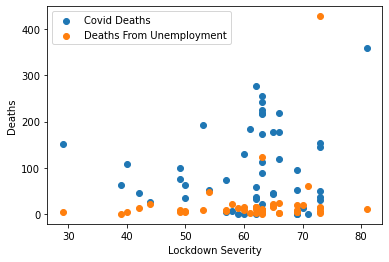

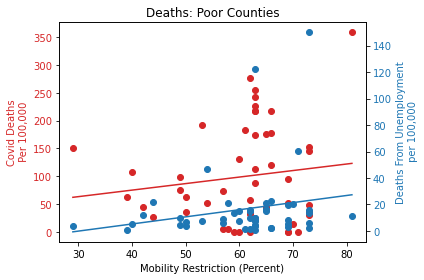

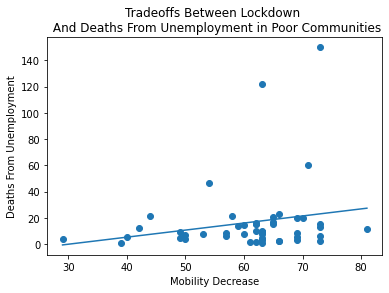

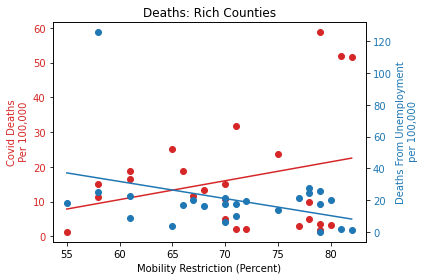

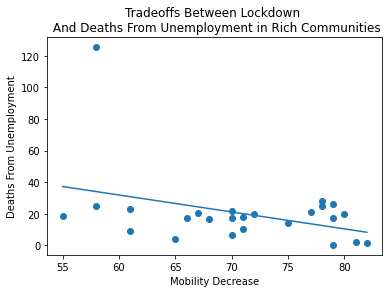

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LR


df_data_poor = pd.read_csv('ComparisonData/poorCountiesDataComplete.csv')
df_data_rich = pd.read_csv('ComparisonData/richCountiesDataComplete.csv')

unemployment_deaths = df_data_poor['Deaths From Unemployment Per 100,000'].values

unemployment_deaths_rich = df_data_rich['Deaths From Unemployment Per 100,000'].values


mob_poor = df_data_poor['Mobility Reduction'].values

mob_rich = df_data_rich['Mobility Reduction'].values


deaths = df_data_poor['Covid Deaths After Lockdown Per 100,000'].values

deaths_rich = df_data_rich['Covid Deaths After Lockdown Per 100,000'].values








plt.figure()
plt.scatter(-mob_poor,deaths,label = 'Covid Deaths')

plt.scatter(-mob_poor,df_data_poor['Deaths From Unemployment Per 100,000'].values,label = 'Deaths From Unemployment')
plt.ylabel('Deaths')
plt.xlabel('Lockdown Severity')
plt.legend()
plt.show()

def max_replace(arr,maxval):
    
    for i in range(len(arr)):
        if arr[i] >maxval:
            arr[i] = maxval
    return arr

unemployment_deaths = max_replace(unemployment_deaths,150)



fig, ax1 = plt.subplots()

plt.title('Deaths: Poor Counties')


reg = LR()
reg.fit(-mob_poor.reshape(-1,1),deaths)

alpha1 = reg.coef_
alpha2 = reg.intercept_

xvals_poor = np.linspace(min(-mob_poor),max(-mob_poor),100)

yvals_covid = np.array([alpha1*x+alpha2 for x in xvals_poor])


color = 'tab:red'
ax1.set_xlabel('Mobility Restriction (Percent)')
ax1.set_ylabel('Covid Deaths\n Per 100,000', color=color)
ax1.scatter(-mob_poor, deaths, color=color)
ax1.plot(xvals_poor,yvals_covid,color = color)
ax1.tick_params(axis='y', labelcolor=color)


reg = LR()
reg.fit(-mob_poor.reshape(-1,1),unemployment_deaths)

alpha1 = reg.coef_
alpha2 = reg.intercept_

xvals_poor = np.linspace(min(-mob_poor),max(-mob_poor),100)

yvals_unemployment = np.array([alpha1*x+alpha2 for x in xvals_poor])




ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths From Unemployment\n per 100,000', color=color)  # we already handled the x-label with ax1
ax2.scatter(-mob_poor, unemployment_deaths, color=color)
ax2.plot(xvals_poor,yvals_unemployment, color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('PoorTradeoffs.png')
plt.show()

plt.figure()
plt.title('Tradeoffs Between Lockdown \n And Deaths From Unemployment in Poor Communities')
plt.scatter(-mob_poor,unemployment_deaths)
plt.plot(xvals_poor,yvals_unemployment)
plt.ylabel('Deaths From Unemployment')
plt.xlabel('Mobility Decrease')
plt.savefig('tradeoffsLockdownUnemployment.png')
plt.show()





# Create some mock data


fig, ax1 = plt.subplots()

plt.title('Deaths: Rich Counties')

reg = LR()
reg.fit(-mob_rich.reshape(-1,1),deaths_rich)

alpha1 = reg.coef_
alpha2 = reg.intercept_

xvals_rich = np.linspace(min(-mob_rich),max(-mob_rich),100)

yvals_covid = np.array([alpha1*x+alpha2 for x in xvals_rich])





color = 'tab:red'
ax1.set_xlabel('Mobility Restriction (Percent)')
ax1.set_ylabel('Covid Deaths\n Per 100,000', color=color)
ax1.plot(xvals_rich,yvals_covid,color=color)
ax1.scatter(-mob_rich, deaths_rich, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


reg = LR()
reg.fit(-mob_rich.reshape(-1,1),unemployment_deaths_rich)

alpha1 = reg.coef_
alpha2 = reg.intercept_

xvals_rich = np.linspace(min(-mob_rich),max(-mob_rich),100)

yvals_unemployment = np.array([alpha1*x+alpha2 for x in xvals_rich])






color = 'tab:blue'
ax2.set_ylabel('Deaths From Unemployment\n per 100,000', color=color)  # we already handled the x-label with ax1
ax2.scatter(-mob_rich, unemployment_deaths_rich, color=color)
ax2.plot(xvals_rich,yvals_unemployment)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('RichTradeoffs.png')
plt.show()

plt.figure()
plt.title('Tradeoffs Between Lockdown \n And Deaths From Unemployment in Rich Communities')
plt.scatter(-mob_rich,unemployment_deaths_rich)
plt.plot(xvals_rich,yvals_unemployment)
plt.ylabel('Deaths From Unemployment')
plt.xlabel('Mobility Decrease')
plt.savefig('tradeoffsLockdownUnemploymentRich.png')
plt.show()







